# Анализ интернет-магазина компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
В ходе работы необходимо будет выполнить следующее:

1) Открыть файл с данными и изучить общую информацию

2) Подготовить данные к работе. Исправить, выявленные в ходе первого этапа проблемы с датафреймом.

3) Провести исследовательский анализ данных. В рамках которого:

   - посмотреть, сколько выпускалось игр за все годы
   - посмотреть, как менялись продажи по платформам (необходимо выбрать платформы с наибольшими продажами и построить распределение по годам, определить характерный срок, в течение которого появляются и исчезают старые платформы
   - определить данные за актуальный период, на основании которого можно построить прогноз на 2017 год
   - необходимо определить, какие платформы лидируют по продажам, растут они или падают, выбрать несколько потенциально прибыльных платформ
   - построить «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результаты
   - определить влияние на продажи внутри одной популярной платформы отзывы критиков и пользователей (построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами), соотнести с продажами игр на других платформах
   - посмотреть на общее распределение игр по жанрам.
    
4) Составить портрет пользователя каждого региона (NA, EU, JP):
   - самые популярные платформы
   - самые популярные жанры
   - определить влияние рейтинга ESRB на продажи в отдельном регионе
    
5) Проверить гипотезы:
   - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   - средние пользовательские рейтинга жанров Action и Sport разные


## Изучение общей информации

Приступим к выполнению первого раздела. Изучим данные.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
warnings.filterwarnings("ignore")

In [2]:
# прочитаем файл
data = pd.read_csv('....csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# получим общую информацию 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# выведем на экран название столбцов
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [5]:
# выведем размер датасета
print('Размер датасета:', data.shape[0])

Размер датасета: 16715


In [6]:
# посчитаем количество дубликатов
print('Количество дубликтов:', data.duplicated().sum())

Количество дубликтов: 0


In [7]:
# выведем уникальные значения по столбцу Name
data_name = data['Name']
data_name_sorted = data_name.sort_values()
data_name_sorted = data_name_sorted.unique()
print(data_name_sorted)

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]


In [8]:
# выведем уникальные значения по столбцу platform
data_platform = data['Platform']
data_platform_sorted = data_platform.sort_values()
data_platform_sorted = data_platform_sorted.unique()
print(data_platform_sorted)

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [9]:
# выведем информацию по столбцу year_of_release
print(data['Year_of_Release'].describe())

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64


In [10]:
# выведем информацию по жанрам игры
data_genre = data['Genre']
data_genre_sorted = data_genre.sort_values()
data_genre_sorted = data_genre_sorted.unique()
print(data_genre_sorted)

['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]


In [11]:
# выведем информацию по столбцу NA_salse
print(data['NA_sales'].describe())

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64


In [12]:
# выведем информацию по столбцу EU_sales
print(data['EU_sales'].describe())

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64


In [13]:
# выведем информацию по столбцу JP_sales
print(data['JP_sales'].describe())

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64


In [14]:
# выведем информацию по столбцу Other_sales
print(data['Other_sales'].describe())

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64


In [15]:
# выведем информацию по столбцу critic_score
print(data['Critic_Score'].describe())

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64


In [16]:
# выведем информацию по столбцу user_score
print(data['User_Score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.5       2
0.2       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64


In [17]:
# выведем информацию по стобцу Raiting
data_rating = data['Rating']
data_rating_sorted = data_rating.sort_values()
data_rating_sorted = data_rating_sorted.unique()
print(data_rating_sorted)

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


In [18]:
# выведем пропуски в значениях
print(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [19]:
# Выведем пропуски  в процентах
for col in data.columns:
    pct_missing = np.mean(data[col].isna())
    print('{} - {}%'.format(col, round((pct_missing * 100), 2)))

Name - 0.01%
Platform - 0.0%
Year_of_Release - 1.61%
Genre - 0.01%
NA_sales - 0.0%
EU_sales - 0.0%
JP_sales - 0.0%
Other_sales - 0.0%
Critic_Score - 51.32%
User_Score - 40.09%
Rating - 40.48%


**Вывод:** в ходе выполненного исследования данных выявили следующее:
1) в таблице 16715 строк и 11 столбцов

2) в нашей таблице следующие столбцы:

   - Name – название игры (тип object)
   - Platform – платформа (тип object)
   - Year_of_Release – год выпуска (тип float)
   - Genre – жанры игры (тип object)
   - NA_sales – продажи в Северной Америке (миллионы проданных копий) (тип float)
   - EU_sales – продажи в Европе (миллионы проданных копий) (тип float)
   - JP_sales – продажи в Японии (миллионы проданных копий) (тип float)
   - Other_sales – продажи в других странах (миллионы проданных копий) (тип float)
   - Critic_score – оценка критиков (максимум 100) (тип float)
   - User_score – оценка пользователей (максимум 10) (тип object)
   - Rating – рейтинг от организации ESRB. Присваивает определенную возрастную категорию (тип object).
   
3) Не было выявлено дубликатов

4) Были выявлены следующие ошибки:

   - названия столбцов с большой буквы, нужно все привести к одному регистру
   - необходимо изменить тип данных в некоторых столбцах: years_of_release из вещественного типа необходимо сделать целочисленный, так как года обычно измеряются в целых числах, столбец user_score также необходимо из строкового типа сделать вещественным, так как мы будем проводить расчеты по данному столбцу, поэтому нам необходимы числа, также столбец critic_score необходимо из вещественного типа сделать целочисленным.
   - это не является ошибкой, но на мой взгляд объемы продаж удобнее смотреть не в миллионах копий, а в тысячах, так как если методом describe() посмотреть описание столбцов с продажами, то данные в миллионах копий продаж, сложны для восприятия, поэтому переведем в тысячи копий
   - также в названиях игр присутствуют лишние знаки: точки, восклицательные знаки, перевернутые восклицательные знаки.
    
5) Кроме того, в приведенном датасете в некоторых столбцах присутствует большое количество пропусков:

   - critic_score – 51,32%
   - user_score – 40,09%
   - rating – 40,48%
   - year_of_release – 1,61%
    
В следующем разделе рассмотрим данные столбцы более подробно для того, чтобы узнать природу данных пропусков.

6) В столбце user_score нам встретилось значение tdb (информация еще не определена). В следующем разделе так же более подробно рассмотрим.

In [20]:
# определяем уникальные значения
data['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

## Подготовка данных для анализа

В данном разделе необходимо сделать следующее:
1) Изменить названия столбцов на верное наименование

2) Перевести миллионы продаж в тысячи в столбцах: NA_sales, EU_sales, JP_sales, other_sales

3) Обработать пропуски, в том числе разобраться с пропуском tdb

4) Изменить типы данных в столбцах:

   - year_of_release
   - critic_score
   - user_score

5) Проверить наличие неявных дубликатов

6) Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

### Изменим наименование столбцов

In [21]:
# применим метод lower() для переименования названия столбцов
data.columns = data.columns.str.lower()

In [22]:
# выведем название столбцов
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия столбцов находится в удобном для работы виде.

### Перевод значений

Переведем миллионы продаж в тысячи в столбцах: na_sales, eu_sales, jp_sales, other_sales

In [23]:
# переведем миллионы копий продаж в тысячи в столбцах: na_sales, eu_sales, jp_sales, other_sales
list_name = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for name in list_name:
    data[name] = data[name] * 1000

In [24]:
# выведем на экран датасет
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41360.0,28960.0,3770.0,8450.0,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15680.0,12760.0,3790.0,3290.0,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15610.0,10930.0,3280.0,2950.0,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,NaN


Продажи переведены в тысячи копий, на мой взгляд, данные стали более читабельны.

### Обработаем пропуски, в том числе tbd

Попробуем более подробно рассмотреть столбцы с пропусками, для того, чтобы понять их природу и определить возможность их восстановления. 
Пропуски есть в 4х столбцах:
1. critic_score - 52,32%
2. user_score - 40.09%
3. rating - 40,48%
4. year_of_release - 1,61%

Рассмотрим столбец user_score, так как в нем есть необычное значение tbd. Посмотрим, в каких годах встречается это значение, возможно, данные за последние годы еще не получены.

In [25]:
print(data[data['user_score'] == 'tbd']['year_of_release'].value_counts())

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64


Как видим разброс в годах, в которых присутствует значение tbd c 1997 по 2016, причем основная масса этих пропусков приходится на 2002-2011 годы. На мой взгляд, адекватной замены этих пропусков нет: можно, например, для заполнения оценки пользователей сравнивать оценки пользователей на других платформах, но данные могут значительно отличаться. Поэтому , если мы не знаем точно, какая оценка пользователей у той или иной игры, оставим эти значения без изменений, единственное, для того, чтобы была возможность работать с данным столбцом и изменять тип данных, преобразуем tbd в NaN

In [26]:
# заменим tbd на NaN
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [27]:
# посмотрим, есть ли tbd в уникальных значениях
print(data['user_score'].value_counts())

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.5      2
0.2      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64


Tbd среди уникальных значений нет. Рассмотрим другие столбцы с пропусками.

Рассмотрим, какие пропуски есть в столбце critic_score и есть ли корреляция данного столбца с другими.

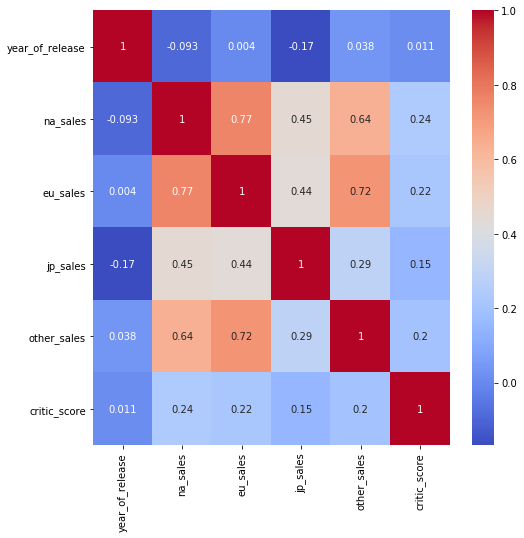

In [28]:
# посмотрим корреляцию с другими столбцами датасета
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
display(data[data['critic_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23200.0,2260.0,4220.0,580.0,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26930.0,630.0,280.0,470.0,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9050.0,10950.0,1930.0,2740.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,10.0,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,10.0,0.0,0.0,0.0,NaN,NaN,NaN


Как мы видим из приведенной коррелиции столбца critic_score сильной корреляции с другими столбцами нет, есть незначительная корреляция со столбцами - регионами продаж. Таким образом, пропуски в данном столбце заполнять не будем, так как, возможно, игры были непопулярные, или продавались в каких-то определенных регионах, или это были давнишние игры, в период их появления просто не делали никаких рейтингов, поэтому и оценки критиков по определенной игре нет. Обоснование данного вывода видно из таблицы выше, например, отсутствуют рейтинги по играм, релиз, которых был в 1984 или 1989 году, или продажи были небольшим количеством копий, 10 тыс и в одном определенном регионе, например, только na_sales или jp_sales.

Рассмотрим пропуски в столбце rating.

In [30]:
# пропуски в столбце rating
display(data[data['rating'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23200.0,2260.0,4220.0,580.0,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26930.0,630.0,280.0,470.0,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9050.0,10950.0,1930.0,2740.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,10.0,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,10.0,0.0,0.0,0.0,NaN,NaN,NaN


In [31]:
# количество игр с релизом в 2016 году
display(data[(data['rating'].isna())&(data['year_of_release'] == 2016)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2980.0,1450.0,2260.0,450.0,NaN,NaN,NaN
1216,Ratchet & Clank (2016),PS4,2016.0,Platform,500.0,760.0,40.0,240.0,NaN,NaN,NaN
1275,Doom (2016),PS4,2016.0,Shooter,540.0,690.0,20.0,240.0,NaN,NaN,NaN
1466,Yokai Watch 3,3DS,2016.0,Action,0.0,0.0,1330.0,0.0,NaN,NaN,NaN
1475,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,480.0,590.0,40.0,210.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,10.0,0.0,NaN,NaN,NaN


In [32]:
# рассмотрим пропуски в столбце reting в зависимости от года релиза
display(data[(data['rating'].isna())&(data['year_of_release'] < 2005)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23200.0,2260.0,4220.0,580.0,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26930.0,630.0,280.0,470.0,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9000.0,6180.0,7200.0,710.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16666,Psychic Detective,PS,1995.0,Adventure,10.0,0.0,0.0,0.0,NaN,NaN,NaN
16693,PGA European Tour,N64,2000.0,Sports,10.0,0.0,0.0,0.0,NaN,NaN,NaN
16694,Carmageddon 64,N64,1999.0,Action,10.0,0.0,0.0,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,10.0,0.0,0.0,0.0,NaN,NaN,NaN


In [33]:
# рассмотрим рейтинг в зависимости от объемов продаж
display(data[(data['rating'].isna())&(data['jp_sales'] < 60)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
72,Minecraft,X360,2013.0,Misc,5700.0,2650.0,20.0,810.0,NaN,NaN,NaN
89,Pac-Man,2600,1982.0,Puzzle,7280.0,450.0,0.0,80.0,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4590.0,2110.0,10.0,680.0,NaN,NaN,NaN
180,Minecraft,PS3,2014.0,Misc,2030.0,2370.0,0.0,870.0,NaN,NaN,NaN
195,Microsoft Flight Simulator,PC,1996.0,Simulation,3220.0,1690.0,0.0,200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,10.0,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,10.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,10.0,0.0,0.0,0.0,NaN,NaN,NaN


Как видим, со столбцом rating ситуация аналогичная, как и со столбцом critic_score, в столбце rating пропуски связаны с годом релиза игры. Так, напрмер в США ESRB рейтинг публикуют с 2005 года, соответственно до этого года информация о рейтингах отсутствует. Также рейтингов нет в данных за 2016 год, возможно, эти данные еще не загружены. После 2005 года в большинстве игр, если релиз проходил в штатах должен быть указан рейтинг. В нашем случае, можно найти рейтинги для некоторых игр, поэтому нужно отправить на доработку датасет, чтобы была указана актуальная информация. Но для анализа заполним пропуски на "нет данных", скорее всего, эти данных нам могут пригодиться

In [34]:
# заполним пропуски в графе rating на 'нет данных'
data['rating'] = data['rating'].fillna('нет данных')

Рассмотрим столбец year_of_release.

In [35]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4260.0,260.0,10.0,710.0,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,590.0,2360.0,40.0,510.0,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1800.0,970.0,0.0,290.0,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1570.0,1020.0,0.0,410.0,NaN,NaN,нет данных
609,Space Invaders,2600,NaN,Shooter,2360.0,140.0,0.0,30.0,NaN,NaN,нет данных
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,10.0,0.0,0.0,0.0,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,10.0,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,10.0,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,10.0,0.0,0.0,0.0,NaN,NaN,нет данных


В данном столбце можно было бы попытаться заполнить пропуски, исходя из названий игр, если в них есть годы. Но это не гарантирует, что данные годы совпадают с годами релиза. Кроме того, процент пропусков небольшой 1,61%, поэтому, на мой взгляд данный столбец можно оставить без заполнения пропусков. Информацию о годе релиза нужно уточнить у тех, кто предоставлял датасет для анализа, или можно, например, самостоятельно искать даты релиза в интернете. Но опять же не всю информацию можно найти.

Таким образом, мы посмотрели все пропуски, приняли во внимание, что практически все пропуски нужно оставить без изменений, чтобы не было искажений в данных. По работе с пропусками, необходимо уточнить информацию о том, где брать данные по пропущенным значениям. Также обработали tbd, теперь можно приступить к изменению типа в некоторых столбцах.

### Изменение типа данных в столбцах

Как мы выяснили ранее в некоторых столбцах необходимо осуществить изменение типа данных:
1. столбец year_of_release из float преобразовать в Int64, так как имеются пропуски
2. столбец critic_score из float преобразовать в Int64
3. столбец user_score из object преобразовать в float64

In [36]:
# преобразуем тип данных в столбце year_of_release
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [37]:
# преобразуем тип данных в столбце critic_score
data['critic_score'] = data['critic_score'].astype('Int64')

In [38]:
# преобразуем тип данных в столбце user_score
data['user_score'] = data['user_score'].astype('float64')

In [39]:
# выведем на экран датасет
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360.0,28960.0,3770.0,8450.0,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,нет данных
2,Mario Kart Wii,Wii,2008,Racing,15680.0,12760.0,3790.0,3290.0,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610.0,10930.0,3280.0,2950.0,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,нет данных


В выведенном датасете видно, что в необходимых нам столбцах изменились типы данных.

### Обработка неявных дубликатов

В данном разделе рассмотрим и обработаем, если появятся, неявные дубликаты. Приведем названия во всех столбцах к нижнему регистру, так как одни и теже названия могут быть написаны и с большой буквы и с маленькой, поэтому, чтобы не было дубликатов приведем все к одному виду. Обработаем столбцы:
1. name
2. platform
3. genre
4. rating

In [40]:
# приведем в нижнему регистру
list_name = ['name', 'platform', 'genre', 'rating']
for name in list_name:
    data[name] = data[name].str.lower()

In [41]:
# выведем на экран датасет
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41360.0,28960.0,3770.0,8450.0,76,8.0,e
1,super mario bros.,nes,1985,platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,нет данных
2,mario kart wii,wii,2008,racing,15680.0,12760.0,3790.0,3290.0,82,8.3,e
3,wii sports resort,wii,2009,sports,15610.0,10930.0,3280.0,2950.0,80,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,нет данных


Все назвнаия приведены к одному регистру. Проверим наличие дубликатов.

In [42]:
print('Количество неявных дубликатов:', data.duplicated().sum())

Количество неявных дубликатов: 0


Отлично, дубликатов нет, можем идти дальше.

### Добавление столбца суммарных продаж

Для добавления столбца суммарных продаж, необходимо сложить продажи по всем регионам: eu_sales, na_sales, jp_sales, other_sales. Данный столбец бцдет выражен в тысячах копий продаж.

In [43]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [44]:
# выведем на экран таблицу 
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41360.0,28960.0,3770.0,8450.0,76,8.0,e,82540.0
1,super mario bros.,nes,1985,platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,нет данных,40240.0
2,mario kart wii,wii,2008,racing,15680.0,12760.0,3790.0,3290.0,82,8.3,e,35520.0
3,wii sports resort,wii,2009,sports,15610.0,10930.0,3280.0,2950.0,80,8.0,e,32770.0
4,pokemon red/pokemon blue,gb,1996,role-playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,нет данных,31380.0


### Вывод

В ходе выполнения предобработки данных было сделано:
1. названия столбцов приведены к одному регистру
2. объемы продаж из миллионов копий приведены к тысячам копий. Это было сделано для повышения читабильности данных
3. проанализированы пропуски, на основании анализа было принято решение не заполнять пропуски, так как информация специфическая для каждой игры и платформы и заполнять средними или медианными значениями будет неверно, так как это может привести к искажению данных. Были обработаны пропуски tbd, мы их заменили на nan
4. изменены типы данных в столбцах: year_of_release, critic_score, user_score
5. привдены все названия в столбцах к одному регистру, юлагодаря чему выяснили, что в данных нет неявных дубликатов
6. добавлен столбец total_sales, в котором указаны суммарные объемы продаж каждой игры по всем, представленным в анализе регионам.

## Исследовательский анализ данных

В ходе выполнения данного раздела необходимо:
   - посмотреть, сколько выпускалось игр за все годы
   - посмотреть, как менялись продажи по платформам (необходимо выбрать платформы с наибольшими продажами и построить распределение по годам, определить характерный срок, в течение которого появляются и исчезают старые платформы
   - определить данные за актуальный период, на основании которого можно построить прогноз на 2017 год
   - необходимо определить, какие платформы лидируют по продажам, растут они или падают, выбрать несколько потенциально прибыльных платформ
   - построить «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результаты
   - определить влияние на продажи внутри одной популярной платформы отзывы критиков и пользователей (построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами), соотнести с продажами игр на других платформах
   - посмотреть на общее распределение игр по жанрам.

### Определение количества игр, выпускавшихся в разные годы

В рамках данного раздела рассмотрим, каков был объем выпуска игр по годам.

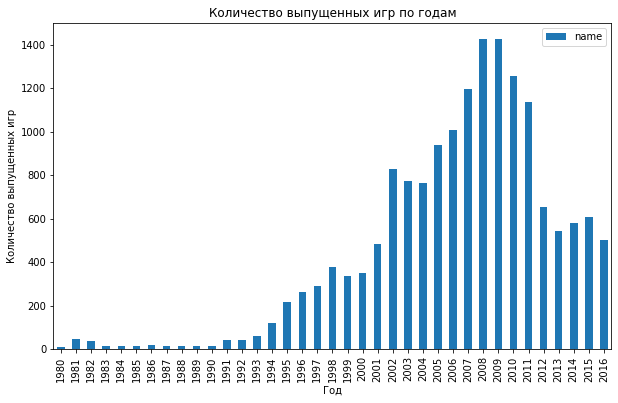

In [45]:
data_grouped_years = (data.groupby('year_of_release')
                      .agg({'name': 'count'})
                      .plot.bar(rot=90, figsize=(10, 6))
                     )
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()

По построенному графику видно, что с 1980 по 1993 год игр выпускается очень мало и можно наблюдать плато, в каждый год выпускается примерно одинаковое количество игр. С 1994 года начинается замется рост количества выпускаемых игр, данный рост стремительный и доходит до своего пика в 2008-2009 году, после чего начинается заметное снижение выпускаемых игр. Возможно такое поведение связано с тем, что рынок видеоигр стал перенасыщенным, пользователей трудно чем-то удивить, да и в современных видеоиграх большое внимание уделяется картинке, поэтому это все приводит к тому, что для выпуска качественной и интересной игры разбработчикам требуется больше времени, чем это было раньше. Кроме того в тот период активно начали развиваться игры для смартфонов, это тоже оказало влияние на развитие компьютерных игр.

Также исходя из графика можно ответить на еще один вопрос: важны ли данные за все периоды. На мой взгляд, данные за все периоды не важны, так как в дальнейшем анализе нас будет интересовать работа с актуальным периодом, по графику видно, что для нас актуальный период связан с сокращением количества выпускаемых игр в год, поэтому для дальнейшего анализа я бы отсекла года становения платформ, а также период бурного роста и рассматривала бы данные с 2009 года. Этот период будет наиболее показательным для дальнейшего прогнозирования выпуска игр.

### Определим изменение продаж по платформам

В данном пункте сгруппируем данные объемы продаж по платформам, отберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос, за какой характерный срок появляются новые и исчезают старые платформы

In [46]:
# сгруппируем данные по платформам
data_platform_grouped = pd.pivot_table(data, index='platform', values='total_sales', aggfunc='sum')

Выберем платформы с наибольшими продажами.

In [47]:
# выведем платформы в зависимости от объеиов продаж
display(data_platform_grouped.sort_values(by='total_sales', ascending=False))

,total_sales
platform,
ps2,1255770.0
x360,971420.0
ps3,939650.0
wii,907510.0
ds,806120.0
ps,730860.0
gba,317850.0
ps4,314140.0
psp,294050.0


Исходя из полученных выше данных будем рассматривать топ 6, так как после ps, выручка от продаж начинает значительно падать.

In [48]:
list_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
data_top_6 = data.query('platform in @list_platforms')

In [49]:
display(data_top_6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41360.0,28960.0,3770.0,8450.0,76,8.0,e,82540.0
2,mario kart wii,wii,2008,racing,15680.0,12760.0,3790.0,3290.0,82,8.3,e,35520.0
3,wii sports resort,wii,2009,sports,15610.0,10930.0,3280.0,2950.0,80,8.0,e,32770.0
6,new super mario bros.,ds,2006,platform,11280.0,9140.0,6500.0,2880.0,89,8.5,e,29800.0
7,wii play,wii,2006,misc,13960.0,9180.0,2930.0,2840.0,58,6.6,e,28910.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,ds,2009,sports,0.0,0.0,10.0,0.0,NaN,NaN,нет данных,10.0
16704,plushees,ds,2008,simulation,10.0,0.0,0.0,0.0,NaN,NaN,e,10.0
16709,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,NaN,NaN,нет данных,0.0
16710,samurai warriors: sanada maru,ps3,2016,action,0.0,0.0,10.0,0.0,NaN,NaN,нет данных,10.0


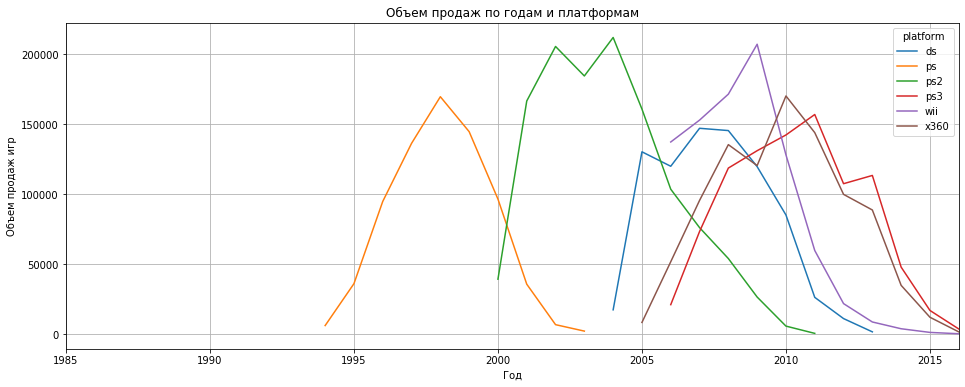

In [50]:
data_top_6_platform_grouped = (pd.pivot_table(data_top_6, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                        .plot(grid=True, figsize=(16, 6))
                        )
plt.title('Объем продаж по годам и платформам')
plt.xlabel('Год')
plt.ylabel('Объем продаж игр')
plt.show()

По данному графику видно, что в целом у всех платформ примерно одинаковые графики "жизни". Определим, сколько лет живет каждая из предстваленных платформ:
1. ds жила с 2004 по 2013 годы - 9 лет (пик продаж приходился на 2007 год)
2. ps жила с 1994 по 2003 годы - 9 лет (пик продаж приходился на 1998 год
3. ps2 жила с 2000 по 2011 годы - 11 лет (пик продаж приходиося на 2002 и 2004 годы)
4. ps3 жила с 2006 по 2016 годы - 10 лет (пик продаж приодился на 2011 год)
5. wii жила с 2006 по 2016 годы - 10 лет (пик продаж приходился на 2009 год)
6. x360 жила с 2005 по 2016 годы - 11 лет (пик продаж приходился на 2010 год)

Из представленных данных вмдно, что в среднем сроки жизни платформы составляет 10 лет, и, возможно, платформы продолжали бы существовать если им на смену не приходили бы более усовершенствованные версии. Также видно, что в среднем пик продаж наступает через 4-5 лет с начала существования платформы, после этого момента наступает угасание интереса пользователей к данной платформе, исключение составляет ps2 за период ее существования наблюдается 2 пика в выручке от продаж с разницей в год.


In [51]:
# сгруппируем данные по платформе и годам выпуска игр
data_years_exist = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

In [52]:
# выведем на экран, сколько лет жила каждая платформа в представленном датасете
data_exist_2 = data_years_exist['platform'].value_counts()
print(data_exist_2)

pc      26
gb      13
x360    12
psp     12
ps2     12
nes     12
ps3     11
wii     11
ds      11
2600    10
snes    10
ps      10
xb       9
gba      8
n64      7
gc       7
dc       7
sat      6
psv      6
3ds      6
wiiu     5
gen      5
ps4      4
xone     4
ng       4
ws       3
scd      2
3do      2
tg16     1
pcfx     1
gg       1
Name: platform, dtype: int64


In [53]:
# выведем описание столбца жизни консолей
print(data_exist_2.describe())

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: platform, dtype: float64


In [54]:
# определим моду, наиболее часто встречающееся значение
print(data_exist_2.mode())

0    12
dtype: int64


В результате проведенного выше анализа можно сказать, что в большинстве случаев платформы меняются за 10-12, среднее значение и медиана примерно одинаковая и сосставлет около 7 лет. Но так как индустрия компьютерных игр динамично меняющаяся отрасль, то актуальными периодом для нее будет 3 года, так как за это время может существенно измениться тренды. Таким образом, актуальным периодом будет период с 2014 по 2016 годы включительно.

### Определение потенциально прибыльных платформ

В даном разделе:
1. сформируем данные по актуальному периоду: как выяснили ранее возьмем данные начиная с 2008 года и заканчивая 2015 годом
2. выберем потенциально прибыльные платформы и определим, растут они или падают
3. посторим ящик с усами по глобальным продажам игр в разбивке по платформам
4. определим, как влияют на продажи внутри одной попульрной платформы отзывы критиков и пользователей
5. соотнесем выводы с продажами игр на других платформах
6. посмотрим на общее распределение игр по жанрам

#### Формирование данных по актуальному периоду

In [55]:
# ограничим рассматриваемый период 2014 и 2016 годами
data_actual_period = data.query('year_of_release >= 2014')

In [56]:
display(data_actual_period.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6030.0,5860.0,360.0,2380.0,NaN,NaN,нет данных,14630.0
42,grand theft auto v,ps4,2014,action,3960.0,6310.0,380.0,1970.0,97,8.3,m,12620.0
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4350.0,3490.0,3100.0,740.0,NaN,NaN,нет данных,11680.0
77,fifa 16,ps4,2015,sports,1120.0,6120.0,60.0,1280.0,82,4.3,e,8580.0
87,star wars battlefront (2015),ps4,2015,shooter,2990.0,3490.0,220.0,1280.0,NaN,NaN,нет данных,7980.0


#### Выбор потенциально прибыльных платформ

Еще раз выведем объемы продаж каждой платформы в зависимости от актульного периода

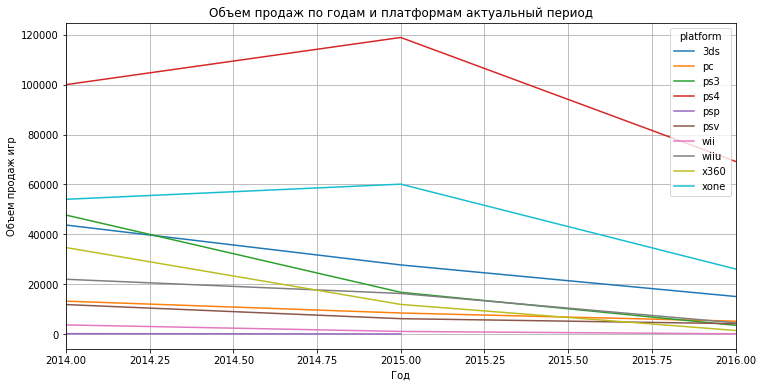

In [57]:
data_actual_period_grouped = (pd.pivot_table(data_actual_period, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                        .plot(grid=True, figsize=(12, 6))
                        )
plt.title('Объем продаж по годам и платформам актуальный период')
plt.xlabel('Год')
plt.ylabel('Объем продаж игр')
plt.show()

In [58]:
# сгруппируем данные для определения потенциально прибыльных платформ с учетом актуального периода
data_actual_period_grouped_sales = pd.pivot_table(data_actual_period, index='platform', values='total_sales', aggfunc='sum')

In [59]:
# выведем платформы в зависимости от объеиов продаж
display(data_actual_period_grouped_sales.sort_values(by='total_sales', ascending=False))

,total_sales
platform,
ps4,288150.0
xone,140360.0
3ds,86680.0
ps3,68180.0
x360,48220.0
wiiu,42980.0
pc,27050.0
psv,22400.0
wii,5070.0


**Исходная версия**

Исходя из приведенного графика видно, что в качестве прибыльных платформ можно выделить 7 , причем у некотрых из них прибыль падает, а у некоторых расчет. Можно выделить платформы, у которых за период с 2008 по 2011 годы были самые высокие продажи, но к настоящему моменту объемы продаж значительно упали. Такими платформами являются:
1. ps3
2. x360
3. wii
4. ds
5. 3ds

Но с 2013 года появились две платформы, в объемах продаж которых заметен рост:
1. ps4, видимо, вышла на замену Ps3
2. pc, объемы продаж данной платформы растут не так быстро, как ps4

В целом можно заметить обсолютно для всех платформ похожую тенденцию: идет падение объемов продаж. Возможно, это связано с бурным развитием сматрфонов и большинство пользователей стали играть на данных устройствах.

**Новая версия**

По построенному выше графику видно, что на 2016 год потенциально прибыльными платформами можно считать:

1) wiiu
2) psv
3) wii
4) pc
5) 3ds

Эти платформы были выбраны исходя из их стабильного состояния, по сравнению с другими платформами за последние годы. Объемы продаж не растут, но и не падают.

In [60]:
data['platform'].sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

In [61]:
data_actual_period_grouped_sales = pd.pivot_table(data_actual_period, index='platform', values='total_sales', aggfunc='sum')

In [62]:
# выведем платформы в зависимости от объеиов продаж
display(data_actual_period_grouped_sales.sort_values(by='total_sales', ascending=False))

,total_sales
platform,
ps4,288150.0
xone,140360.0
3ds,86680.0
ps3,68180.0
x360,48220.0
wiiu,42980.0
pc,27050.0
psv,22400.0
wii,5070.0


#### Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам

Пстроим график ящик с усами для 7 наиболее прибыльных по глобальными продажам платформ:
- ps4
- xone
- 3ds
- ps3
- x360
- wiiu
- pc

In [63]:
# отфильтруем датасет по необходимым платформам
list_top_platform = ["ps4", "xone", "3ds", "ps3", "x360", "wiiu", "pc"]
data_actual_period_top_platform = data_actual_period.query('platform in @list_top_platform')

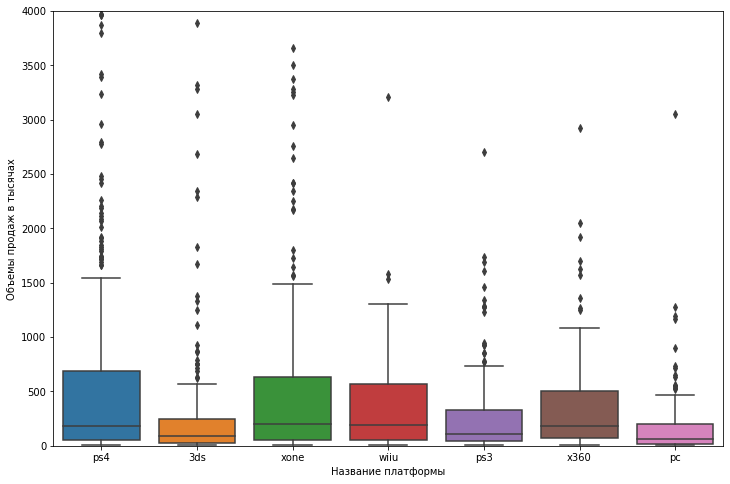

In [64]:
# построим ящик с усами
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=data_actual_period_top_platform)
plt.ylim(0, 4000)
plt.xlabel('Название платформы')
plt.ylabel('Объемы продаж в тысячах')
plt.show()

Исходя из построенного графика с усами можно сделать следующий вывод:
1. медиана выручки за игру варьируется от 100 тыс до 300 тыс
2. на графике также видны аномалии, некотрые игры приносят начительно больше прибыли, чем все остальные: для ps4 это пороговое значение аномалии составлет 1700 тысяч, 3ds - 600 тыс, xone - 1700 тыс, wiiu - 1200 тыс, ps3 - 700 тыс, x360 - 1200 тыс, pc - 500 тыс.
3. больше всего из представленных данных выделяется платформа ps4 и xone, в ней самый высокий размер аномальных значений, при том, что медиана практически совпадает со всеми остальными платформами

#### Определение влияния на продажи отзывов критиков и пользователей

По условию определено, что нам нужно определить, как влияют на продажи внутри одной платформы отзывы критиков и пользователей. В качестве популярной платформы возьмем лидера в актуальном периоде - ps3

In [65]:
# отфильтруем данные по ps4
data_actual_period_ps3 = data_actual_period.query('platform == "ps4"')

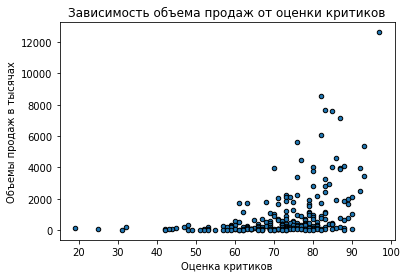

In [66]:
# построим диаграмму рассеяния в зависимости от оценки критиков
data_actual_period_ps3.plot(kind='scatter', x='critic_score', y='total_sales', ec='black')
plt.title('Зависимость объема продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объемы продаж в тысячах')
plt.show()

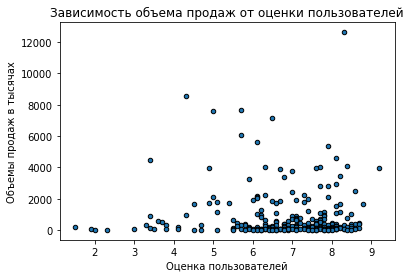

In [67]:
# построим диаграмму рассеяния в зависимости от оценки пользователей
data_actual_period_ps3.plot(kind='scatter', x='user_score', y='total_sales', ec='black')
plt.title('Зависимость объема продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Объемы продаж в тысячах')
plt.show()

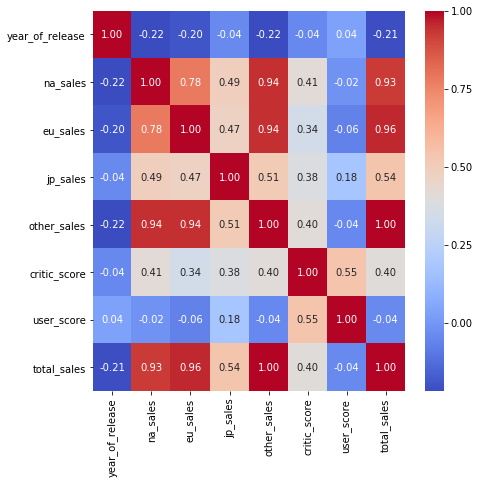

In [68]:
# построим матрицу корреляции 
plt.figure(figsize=(7, 7))
sns.heatmap(data_actual_period_ps3.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

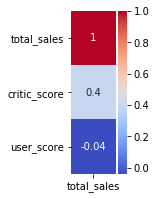

In [69]:
# построим корреляцию отдельно в завимисости от оценки пользователей и критиков
data_actual_period_ps3_filtered = data_actual_period_ps3[['total_sales', 'critic_score', 'user_score']]
plt.figure(figsize=(1, 3))
sns.heatmap(data_actual_period_ps3_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap='coolwarm', annot=True)
plt.show()

Исходя из полученных данных на диаграммах рассеяния, а также после построения таблицы корреляции, можно сделать следующие выводы: оценка критиков сильнее влияет на объемы продаж на платформе ps4, чем оценка пользователей. На графике диаграммы рассеяния видно, что до рейтинга в 70 пунктов, влияние оценки критиков на объемы продаж не такие значительные, как после 70 пунктов. Далее видна зависимость, что, чем выше оценка критиков, тем выше объемы продаж. Если же говорить об оценке пользователей, то на диаграмме рассеяния видно, что в целом оценка пользователей не влияет на объемы продаж. Также, исходя из матрица корреляции для платформы ps4 можно увидеть достаточно сильную зависимость оценки пользователей от оценки критиков.

In [70]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41360.0,28960.0,3770.0,8450.0,76,8.0,e,82540.0
1,super mario bros.,nes,1985,platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,нет данных,40240.0
2,mario kart wii,wii,2008,racing,15680.0,12760.0,3790.0,3290.0,82,8.3,e,35520.0
3,wii sports resort,wii,2009,sports,15610.0,10930.0,3280.0,2950.0,80,8.0,e,32770.0
4,pokemon red/pokemon blue,gb,1996,role-playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,нет данных,31380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.0,0.0,10.0,0.0,NaN,NaN,нет данных,10.0
16711,lma manager 2007,x360,2006,sports,0.0,10.0,0.0,0.0,NaN,NaN,нет данных,10.0
16712,haitaka no psychedelica,psv,2016,adventure,0.0,0.0,10.0,0.0,NaN,NaN,нет данных,10.0
16713,spirits & spells,gba,2003,platform,10.0,0.0,0.0,0.0,NaN,NaN,нет данных,10.0


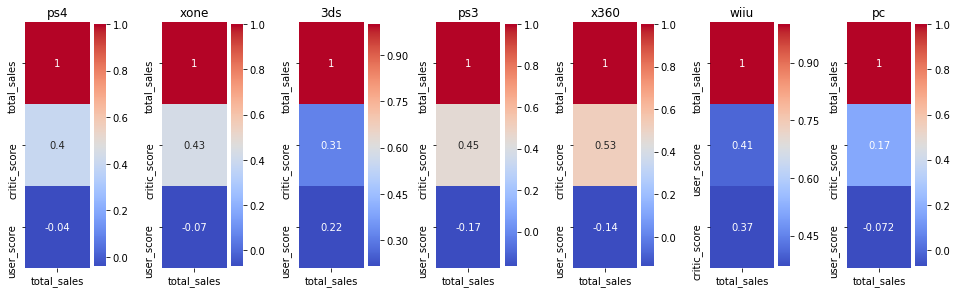

In [71]:
# выведем корреляции по топовым платформам
fig, ax =plt.subplots(1, len(list_top_platform), figsize=(10, 4))
fig.tight_layout()
for i in range(len(list_top_platform)):
    plt.subplots_adjust(right = 1.3)
    name = list_top_platform[i]
    data_actual_period_consol = data_actual_period.query('platform == @name')
    data_actual_period_consol_filtered = data_actual_period_consol[['total_sales', 'critic_score', 'user_score']]
    sns.heatmap(data_actual_period_consol_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap='coolwarm', annot=True, ax = ax[i])
    ax[i].set_title(name)
plt.show()

Если сравнивать зависимость объемов продаж от оценки пользователей и критиков, в топ-7 платформ примерно одинаковая зависимость: объем продаж платформ ps4, xone, ps3, x360, wiiu завится от ценки критиков и мало зависят от оценки пользователей, причем зависимость оценки критиков на объемы продаж на платформе x360 сильнее всего.

Но есть и отличающиеся платформы, так, например объемы продаж на платформе pc практически не зависят от оценок пользователей и критиков. А объемы продаж на платформе wiiu зависят как от оценки критиков, так и от оценки пользователей.

#### Общее распределение игр по жанрам

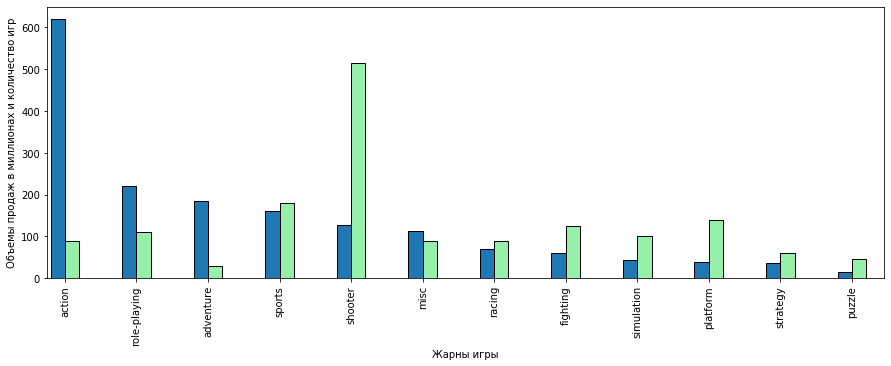

In [74]:
pivot_actual_period_genre = (data_actual_period.groupby('genre')
                      .agg({'name': 'count', 'total_sales': 'median'})
                       .sort_values(by='name', ascending=False)
                      )
plot1 = pivot_actual_period_genre['name']
plot1.plot(kind='bar', figsize=(15, 5), ec='black',  width=0.2, position=1)

plot2 = pivot_actual_period_genre['total_sales']
plot2.plot(kind='bar', figsize=(15, 5), ec='black', width=0.2, color='#97F0AA', position=0)
plt.xlabel('Жарны игры')
plt.ylabel('Объемы продаж в миллионах и количество игр')
plt.legend=(['Количество продаж', 'Медиана продаж'])

 Если рассматривать общее распределение игр по жанрам относительно медианы стоимости игр в каждом жанре, то жанрами, игры которых приносят стабильно высокий доход являются:
 
1) shooter
2) sports
3) platform
4) fighting

Данные игры популярны, так как в них много движения, действия, что, вероятно, интересно пользователям.

Жанры, игры которых приносят стабильно низкий доход:

1) advanture
3) strategy
3) pussle

Данные игры требуют большей усидчивости, поэтому они менее популярны

#### Вывод

В ходе проведенного исследовательского анализа было получено следующее:

1. первые игры начала появляться еще в 1980 году, причем с 1980 по 1993 год заметно плато, с 1994 года начинается резкий рост продаж и выпуска игр, пик наступает в 2008-2009 годах, после чего начинается падение продаж компьютерных игр

2. за весь период существования компьютерных игр, можно выделить наиболее популярные платформы:
   - ds
   - ps
   - ps2
   - ps3
   - wii
   - x360
   
Можно выделить, что платформы живут 10-12, но при этом их обновление происходит в среднем за 7 лет. Но так как идустрия компьютерных игр быстро меняющаяся структура, то актуальный период будет равен трем годам с 2014 по 2016 включительно

3. исходя из актуального периода самыми прибыльными платформами являются:
   - ps4
   - xone
   - 3ds
   - ps3
   - x360
   - wiiu
   
Перспективными платформами можно считать:

    1) wiiu
    2) psv
    3) wii
    4) pc
    5) 3ds

4. благодаря анализу мы выяснили, что объемы продаж в большинстве своем зависят от полоительной оценки критиков, и чем выше рейтинг, тем больше зависисмость объема продаж. При этом зависимость объемов продаж от рейтинга пользователей небольшая. Это логично, так как пользователи с большей охотой приобретают игры с хорошим рейтингом критиков.

5. жанры, игры которых приносят стабильно высокий доход:

    1) shooter
    2) sports
    3) platform
    4) fighting

Жанры, игры которых приносят стабильно низкий доход:

    1) advanture
    2) strategy
    3) pussle

## Портрет пользователей каждого региона

В данном разделе необходимо составить портрет каждого региона: NA, EU, JP: 
1. самые популярные платформы (топ-5)
2. самые популярные жанры (топ-5)
3. влияение рейтинга ERSB на продажи в регионах

In [75]:
# напишем функцию для формирования графиков по регионам
def top_in_region_plot(groupby, region, ax):
    """
    Формирует графики в зависимости от группировок
    """
    pivot_actual_period = (data_actual_period.groupby(groupby)
                           .agg({region: 'sum'})
                           .sort_values(by=region, ascending=False)[:5]
                          )
    title_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color_dict = {'na_sales': None, 'eu_sales': 'forestgreen', 'jp_sales': 'yellow'}
    plot = pivot_actual_period.plot(kind='bar', ec='black', title=title_dict[region], ax=axes[ax], color=color_dict[region], rot=20)
    plot.legend()

### Самые популярные платформы

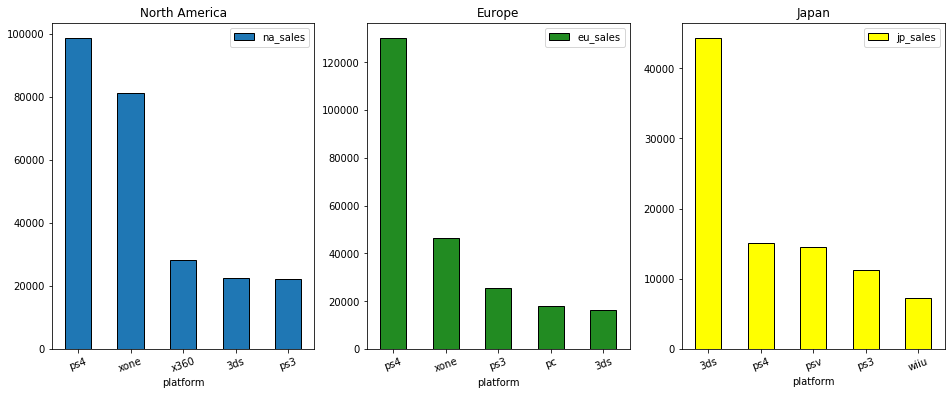

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
top_in_region_plot('platform', 'na_sales', 0)
top_in_region_plot('platform', 'eu_sales', 1)
top_in_region_plot('platform', 'jp_sales', 2)

На данных грпафиках видно, что в Северной Америке и Европе вкусы пользователей примерно совпадают, в топе самых популярных платформ: ps4, xone, 3ds, ps3. Но в штатах также большой популярностью пользуется платформа x360, а в Европе pc. В то время как в Японии рынок значительно отличается, здесь в топе такие платформы как: 3ds, ps4, psv, ps3 и меньшей поопулярностью пользуется платформа wiiu.

Также на графике видно, что в Северной Америке и Европе самые большие выручки от продаж по сравнению с Японией. В Японии выручка от продаж в 6 раз меньше, чем в Северной Америке. 

Также можно увидеть, что в Северной Америке и Европе разница между объемами продаж между топ-1 и топ-5 платформами отличется в 5 и 3 раза соответственно, то в Японии разница между топ-1 и топ-5 не такая значительная.

### Самые популярные жанры

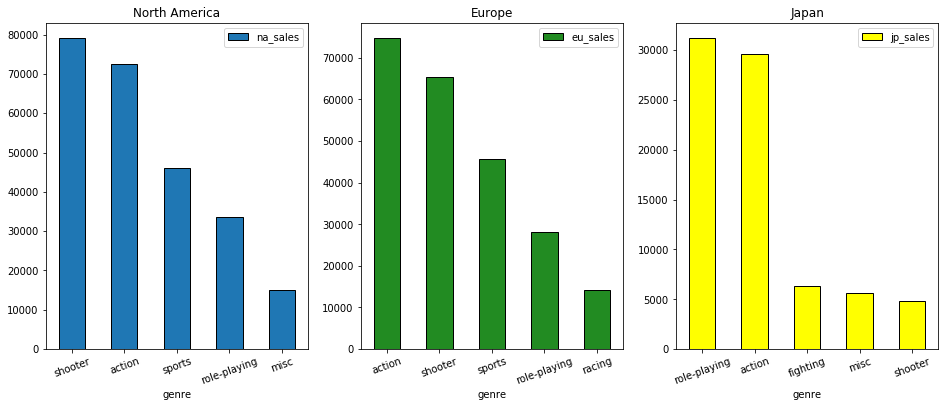

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
top_in_region_plot('genre', 'na_sales', 0)
top_in_region_plot('genre', 'eu_sales', 1)
top_in_region_plot('genre', 'jp_sales', 2)

Если смотреть по жанрам, то в Сверной Америке и Европе картина идентичная: самым популярным жанром игр является action, далее в порядке убывания популярности идут: shooter, action, sports, role-playing. При этом в Северной Америке популярен жанр misc, а в Европе racing. При этом в Японии картина выглядит совернно иначе, здесь самым популярным жанром явлется role-playing, action, менее популярными являются fighting, misc, shooter. Важно заметить что жанр action популярен во всех локациях.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [78]:
display(data[(data['year_of_release'] <= 2016)&(data['year_of_release'] >= 2014)&(data['rating'] == 'нет данных')]['rating'].count())

749

In [79]:
data_actual_period['rating'].value_counts()

нет данных    749
t             271
m             265
e             219
e10+          185
Name: rating, dtype: int64

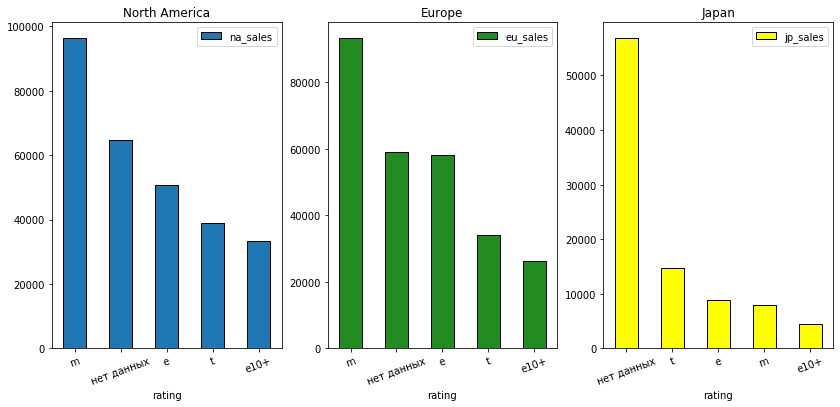

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
top_in_region_plot('rating', 'na_sales', 0)
top_in_region_plot('rating', 'eu_sales', 1)
top_in_region_plot('rating', 'jp_sales', 2)

По сравнению с предыдущими графиками на данном графике объемы продаж в зависимости от рейтинга ESRB примерно ооднаковые во всех регионах: Северной Америке, Европе, Японии. В основном можно наблюдать преобладание 5ти рейтингов: 
   - e - для всех,
   - m - для взрослых,
   - t - для подростков,
   - e10+ - для всех старше 10 лет
   - нет данных
   
В Северной Америке и Европе преобладают продажи игр с рейтинги для взрослых и нет данных, а в Японии нет данных и для подростков. И во всех регионах одинаковая небольшая доля продаж с рейтингом "для всех старше 10 лет". Возможно, такая разница связана с тем, что данная система рейтингов в меньшей мере поддерживается в Японии.

### Вывод

Составим портрет пользователя каждого региона:
1. Северная Америка:
   - самые популярные платформы: ps4, xone, x360, 3ds, ps3
   - самые популярные жанры: shooter, action, sports, role-playing, misc
   - рейтинги ESRB, которые больше всего влияют на объем продаж: m - для взрослых и нет данных, e - для всех
   
2. Европа:
   - самые популярные платформы: ps4, xone, ps3, pc, 3ds
   - самые популярные жанры: action, shooter, sports, role-playing, racing
   - рейтинги ESRB, которые больше всего влияют на объем продаж: нет данных, e - для всех, m - для взрослых
   
3. Япония:
   - самые популярные платформы: 3ds, ps4, psv, ps3, wiiu
   - самые популярные жанры: role-playing, action, fighting, misc, shooter 
   - рейтинги ESRB, которые больше всего влияют на объем продаж: нет данныхб, e - для всех, t - для подростков

## Проверка гипотез

В данном разделе необходимо проверить две гипотезы:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. средние пользовательские рейтинги жанров Action и Sports разные

Для оценки гипотез будем использовать t-критерий Стьюдента, так как сравниваются выборки, независимые между собой и сравнивать мы будем средние двух генеральных совокупностей. Общепринятый критический уровень статистической значимости от 5% до 1%. В нашем исследовании установим это значение нестрогим - 5%.

In [81]:
# определеим критический уровень статистической значимости 
alpha = 0.05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:
- Н0 (нулевая гипотеза): средние пользовательские рейтинги платформ Xbox One и РС одинаковые
- Н1 (альтернативная гипотеза): средние пользовательские рейтинги платформ Xbox One и РС разные

In [82]:
# создадим столбец с рейтингом для xbox one
xbox_one_rating = data_actual_period[(data_actual_period['platform'] == 'xone')&(data_actual_period['user_score'].isna()==False)]['user_score']

In [83]:
# определим, достаточное ли количество строк для использования t-критерия Стьюдента 
print('Количество строк с рейтингом:', xbox_one_rating.count())

Количество строк с рейтингом: 165


In [84]:
# создадим столбец с рейтингом для pc
pc_rating = data_actual_period[(data_actual_period['platform'] == 'pc')&(data_actual_period['user_score'].isna()==False)]['user_score']

In [85]:
# определим, достаточное ли количество строк для использования t-критерия Стьюдента 
print('Количество строк с рейтингом:', pc_rating.count())

Количество строк с рейтингом: 122


In [86]:
# проведем проверку гипотезы
results = st.ttest_ind(xbox_one_rating, pc_rating)
print(f'р-значение: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получится отвергнуть нулевую гипотезу')

р-значение: 0.10450507919348415
Не получится отвергнуть нулевую гипотезу


In [87]:
# посчитаем средний рейтинг по двум платформам
print('Средняя пользовательская оценка игр платформы Xbox One:', xbox_one_rating.mean())
print('Средняя пользовательская оценка игр платформы PC:', pc_rating.mean())

Средняя пользовательская оценка игр платформы Xbox One: 6.594545454545456
Средняя пользовательская оценка игр платформы PC: 6.298360655737705


Так как p-value - это вероятность получить такое или бОльшее различие в выборочных средних при условии, что нулевая гипотеза верна. Здесь мы получили большую вероятность такого события, поэтому можем предположить, что нулевую гипотезу отвергнуть не получится. Таким образом, предполагаем, что средние пользовательские рейтинги платформ Xbox One и РС одинаковые. Если выводить их значения получим средний пользовательский рейтинг для Xbox One - 6.47, для РС - 6.75. Видно, что средние рейтинги отличаются не сильно.

### Средние пользовательские рейтинги Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:
- Н0 (нулевая гипотеза): средние пользовательские рейтинги жанров Action и Sports одинаковые
- Н1 (альтернативная гипотеза): средние пользовательские рейтинги жанров Action и Sports  разные

In [88]:
# создадим столбец с рейтингом для жанра Action
action_rating = data_actual_period[(data_actual_period['genre'] == 'action')&(data_actual_period['user_score'].isna()==False)]['user_score']

In [89]:
# определим, достаточное ли количество строк для использования t-критерия Стьюдента 
print('Количество строк с рейтингом:', action_rating.count())

Количество строк с рейтингом: 297


In [90]:
# создадим столбец с рейтингом для жанра Sports
sports_rating = data_actual_period[(data_actual_period['genre'] == 'sports')&(data_actual_period['user_score'].isna()==False)]['user_score']

In [91]:
# определим, достаточное ли количество строк для использования t-критерия Стьюдента
print('Количество строк с рейтингом:', sports_rating.count())

Количество строк с рейтингом: 127


In [92]:
# проведем проверку гипотезы
results = st.ttest_ind(action_rating, sports_rating)
print(f'р-значение: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получится отвергнуть нулевую гипотезу')

р-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [93]:
# посчитаем средний рейтинг по двум платформам
print('Средняя пользовательская оценка игр жанра Action:', action_rating.mean())
print('Средняя пользовательская оценка игр жанра Sports:', sports_rating.mean())

Средняя пользовательская оценка игр жанра Action: 6.760606060606061
Средняя пользовательская оценка игр жанра Sports: 5.2251968503937


Так как p-value - это вероятность получить такое или бОльшее различие в выборочных средних при условии, что нулевая гипотеза верна. Здесь мы получили меньшую вероятность такого события, поэтому можем предположить, что нулевую гипотезу можно отвергнуть. Таким образом, предполагаем, что средние пользовательские рейтинги жанров Action и Sports разные. Если выводить их значения получим средний пользовательский рейтинг для Action - 6.87, для Sports - 6.27. Видно, что средние рейтинги отличаются.

### Вывод

В ходе проверки гипотез получили следующее:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

В ходе проведенной работы было сделано следующее:

1) был изучен датасет и проведена предобработка датасета (названия столбцов приведены к одному регистру, объемы продаж из миллионов копий приведены к тысячам копий,  проанализированы пропуски, на основании анализа было принято решение не заполнять пропуски, так как информация специфическая для каждой игры и платформы и заполнять средними или медианными значениями будет неверно, были обработаны пропуски tbd, и заменены на nan, изменены типы данных в столбцах: year_of_release, critic_score, user_score, привдены все названия в столбцах к одному регистру, добавлен столбец total_sales, в котором указаны суммарные объемы продаж каждой игры по всем, представленным в анализе регионам)

2) в ходе проведенного исследовательского анализа было получено следующее:
   - первые игры начала появляться еще в 1980 году, причем с 1980 по 1993 год заметно плато, с 1994 года начинается резкий рост продаж и выпуска игр, пик наступает в 2008-2009 годах, после чего начинается падение продаж компьютерных игр, которое продолжается до сих пор. Упор идет на игры для мобильных устройств.
   - за весь период существования компьютерных игр, можно выделить наиболее популярные платформы: ds, ps, ps2, ps3, wii, x360
   
   Можно выделить, что платформы живут 10-12, но при этом их обновление происходит в среднем за 7 лет. Таким образом актуальным периодом, на основании которого можно строить модель прогноза на 2017 год можно считать период с 2008 по 2015 годв включительно.
   - исходя из актуального периода самыми прибыльными платформами являются: ps4, xone, 3ds, ps3, x360, wiiu
   - потенциально прибыльными платформами являются: wiiu, psv, wii, pc, 3ds
   - благодаря анализу мы выяснили, что объемы продаж в большинстве своем зависят от полоительной оценки критиков, и чем выше рейтинг, тем больше зависисмость объема продаж. При этом зависимость объемов продаж от рейтинга пользователей небольшая. Это логично, так как пользователи с большей охотой приобретают игры с хорошим рейтингом критиков
   - жанрами, приносящими стабильно высокий доход являются: shooter, sports, platform, fighting
   - жанрами, приносящими стабильно низкий доход являются: adventure, strategy, puzzle
   
3) составили портрет пользователя каждого региона:
   1. Северная Америка:
      - самые популярные платформы: ps4, xone, x360, 3ds, ps3
      - самые популярные жанры: shooter, action, sports, role-playing, misk
      - рейтинги ESRB, которые больше всего влияют на объем продаж: e - для всех, m - для взрослых и нет данных
   
   2. Европа:
      - самые популярные платформы: ps4, xone, ps3, pc, 3ds
      - самые популярные жанры: action, shooter, sports, role-playing, racing
      - рейтинги ESRB, которые больше всего влияют на объем продаж: e - для всех, m - для взрослых  и нет данных
   
   3. Япония:
      - самые популярные платформы: 3ds, ps4, psv, ps3, wiiu 
      - самые популярные жанры: role-playing, action, fighting, misk, shooter 
      - рейтинги ESRB, которые больше всего влияют на объем продаж: нет данных, e - для всех, t - для подростков
   
4) в ходе проверки гипотез получили следующее:
   - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   - средние пользовательские рейтинги жанров Action и Sports разные
   
5) для регионов Европы и Северной Америки можно выявить следуюющие закономерности успешной игры:
   - игра может быть реализована на платформах xone, ps4, в жанре action, shooter, sports, с рейтингом ESRB E или M, и игра должна быть такой, чтобы понравилась критикам.
   
6) для Японии можно выявить следуюющие закономерности успешной игры:
   - игра может быть реализована на платформе 3ds, в жанре role-playing или action, с рейтингом ESRB T, и игра должна быть такой, чтобы понравилась критикам.